In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import cross_val_score

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data= pd.read_csv('/content/dataset.csv')
data[data.columns[15]]= label_encoder.fit_transform(data[data.columns[15]])
print(data)

      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
0  

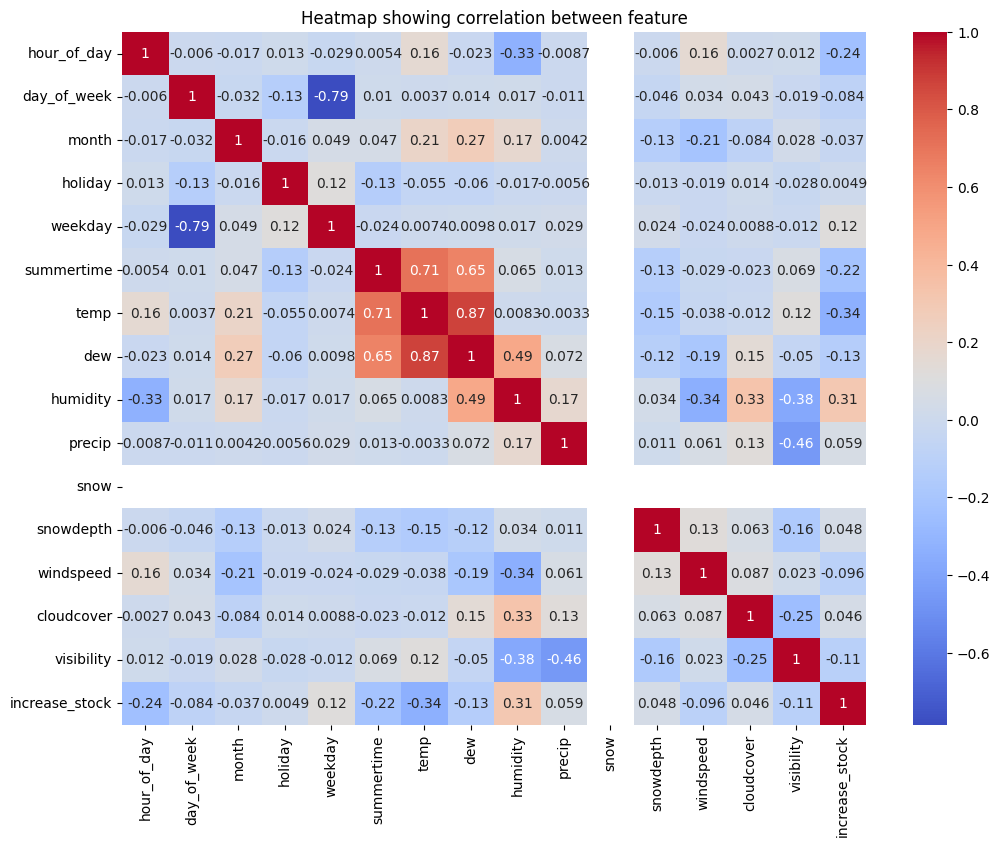

In [ ]:
correlation_matrix = data.corr()  # X contains the features
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Heatmap showing correlation between feature')
plt.show()

In [ ]:
correlation_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

['dew']


In [ ]:

data = data.drop(columns=['dew'])

In [ ]:
# Separate features and target
X = data.drop(columns=['increase_stock'])
y = data['increase_stock']

# Apply random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(y_resampled.shape)

(2624,)


In [ ]:
# Perform cyclical encoding for hour_of_day and day_of_week
X_resampled['hour_sin'] = np.sin(2 * np.pi * X_resampled['hour_of_day'] / 24)
X_resampled['hour_cos'] = np.cos(2 * np.pi * X_resampled['hour_of_day'] / 24)
X_resampled['day_sin'] = np.sin(2 * np.pi * X_resampled['day_of_week'] / 7)
X_resampled['day_cos'] = np.cos(2 * np.pi * X_resampled['day_of_week'] / 7)
print(X_resampled)

      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
2619            7            3      9        0        1           1  18.7   
2620           19            3     10        0        1           1  14.8   
2621           17            0      5        0        1           1  25.7   
2622           14            2      8        0        1           1  32.7   
2623           18            6      4        0        0           1  22.1   

      humidity  precip  snow  snowdepth  windspeed  cloudcover  visibility 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # Splitting the data into train and test sets (80/20)

#LDA

In [ ]:
clf = LinearDiscriminantAnalysis()


clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

In [ ]:
scores1 = cross_val_score(clf, X, y, cv=5)

In [ ]:
metrics.accuracy_score(Y_test, y_pred)

0.8076190476190476

In [ ]:
metrics.confusion_matrix(Y_test, y_pred)

array([[214,  44],
       [ 57, 210]])

In [ ]:
report=metrics.classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       258
           1       0.83      0.79      0.81       267

    accuracy                           0.81       525
   macro avg       0.81      0.81      0.81       525
weighted avg       0.81      0.81      0.81       525



In [ ]:
trans = clf.transform(X_resampled)
X_train, X_test, Y_train, Y_test = train_test_split(trans, y_resampled, test_size=0.2, random_state=42)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

In [ ]:
scores2 = cross_val_score(clf, X, y, cv=5)

In [ ]:
metrics.accuracy_score(Y_test, y_pred)

0.8076190476190476

In [ ]:
metrics.confusion_matrix(Y_test, y_pred)

array([[214,  44],
       [ 57, 210]])

In [ ]:
report=metrics.classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       258
           1       0.83      0.79      0.81       267

    accuracy                           0.81       525
   macro avg       0.81      0.81      0.81       525
weighted avg       0.81      0.81      0.81       525



#QDA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
scores3 = cross_val_score(clf, X, y, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
metrics.accuracy_score(Y_test, y_pred)

0.5485714285714286

In [ ]:
metrics.confusion_matrix(Y_test, y_pred)

array([[ 41, 217],
       [ 20, 247]])

In [ ]:
report=metrics.classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.16      0.26       258
           1       0.53      0.93      0.68       267

    accuracy                           0.55       525
   macro avg       0.60      0.54      0.47       525
weighted avg       0.60      0.55      0.47       525



In [ ]:
print(scores1)
print(scores2)
print(scores3)

[0.85625  0.821875 0.821875 0.85     0.85    ]
[0.85625  0.821875 0.821875 0.85     0.85    ]
[0.596875 0.7875   0.540625 0.325    0.5625  ]


#Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lda = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, scoring='accuracy')
grid_search_qda = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=param_grid_qda, cv=5, scoring='accuracy')

grid_search_lda.fit(X_train, Y_train)
grid_search_qda.fit(X_train, Y_train)

best_lda_model = grid_search_lda.best_estimator_
best_qda_model = grid_search_qda.best_estimator_

y_pred_lda = best_lda_model.predict(X_test)
y_pred_qda = best_qda_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 645, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/d

In [ ]:
print("Best LDA model:", best_lda_model)
print("Best LDA score:", grid_search_lda.best_score_)
print("Best QDA model:", best_qda_model)
print("Best QDA score:", grid_search_qda.best_score_)

print("LDA accuracy:", metrics.accuracy_score(Y_test, y_pred_lda))
print("QDA accuracy:", metrics.accuracy_score(Y_test, y_pred_qda))

Best LDA model: LinearDiscriminantAnalysis(solver='lsqr')
Best LDA score: 0.8289623820888737
Best QDA model: QuadraticDiscriminantAnalysis(reg_param=0.4)
Best QDA score: 0.8427809978406635
LDA accuracy: 0.8076190476190476
QDA accuracy: 0.8114285714285714
